# Least Squares Approximation Proposal

## Motivation

For a general linear system, let matrix $\textbf{A} \in M_{nxm}(R)$ and vector $\vec{b}\in \mathbb{R}^n$, we cannot always guarantee a solution $\vec{x}$ exists such that $\textbf{A}\vec{x} = \vec{b}$. However, is there a solution $\vec{x}$ such that $||\textbf{A}\vec{x}- \vec{b}||$ is as small as possible (i.e. the error/distance between our solution and the truth is as small as possible)? 

Yes, we can guarantee such an optimal solution with Least Squares Approximation.

## Definitions

We will be using the following definitions and notations in our writeup:

- Let $U\subset V$ be a finite dimensional subspace of some vector space V. 
- The Orthogonal Projection of $V$ onto $U$ is the linear transformation:

$$
proj_U: V \rightarrow V
\newline 
\vec{v} \rightarrow \vec{v}^{\parallel}

\newline

\text{where }\vec{v}^{\parallel}\text{ and }\vec{v}-\vec{v}^{\parallel}\in U^{\perp}
$$


## Theorem (1)

Let $U\subset V$ be as defined and $\overrightarrow{v}\in V$ Then,

$$
||\vec{v}-proj_U(\vec{v})|| \leq ||\vec{v}-\vec{u}|| \text{ for all } \vec{u} \in U
$$

Proof:

## Theoerm (2)

This answers our motivational question. The least squares solutions to the linear systerm $\textbf{A}\vec{x} = \vec{b}$ are the solutions to the linear system,

$$
(\textbf{A}^T\textbf{A})\vec{x}=\textbf{A}^T\vec{b}
$$

### Proof of Theorem (2)

The least square solution to the linear system $A\vec{x} = \vec{b}$ are the $(A^TA)\vec{x} = A^T\vec{b}$.

Suppose there are a system of linear equations represented in matrix form as $A\vec{x} = \vec{b}$:
- $A$ is an $m \times n$ matrix with $m$ being the number of equations and $n$ the number of unknowns.
- $\vec{x}$ is an $n$-dimensional vector of the unknowns.
- $\vec{b}$ is an $m$-dimensional vector of constants.

Suppose this linear system is inconsistent, we can at least find a $\vec{x}\in R^n$ such that $||A\vec{x} - \vec{b}||$ is as small as possible. This $\vec{x}$ is called a least-square solution.
Mathematically, we look for a vector $\vec{x}$ that minimizes the 2-norm of the residuals:

\begin{equation}
\min_{\vec{x}} ||A\vec{x} - \vec{b}||^2
\end{equation}

**Mathematical Proof:**

1. Define the residual vector as $\vec{r} = A\vec{x} - \vec{b}$. The least squares method seeks to minimize the sum of the squares of the components of $\vec{r}$, which is equivalent to minimizing the Euclidean norm squared of $\vec{r}$:

\begin{equation}
\| \mathbf{r} \|^2 = \mathbf{r}^T \mathbf{r} = (A\vec{x} - \vec{b})^T (A\vec{x} - \vec{b})
\end{equation}

2. Expanding the above expression, we have:

\begin{equation}
\| \mathbf{r} \|^2 = (A\vec{x})^T (A\vec{x}) - 2\vec{b}^T A\vec{x} + \vec{b}^T \vec{b}
\end{equation}

3. Using the properties of matrix transpose, $(AB)^T = B^T A^T$, the first term could be:

\begin{equation}
(A\vec{x})^T (A\vec{x}) = \vec{x}^T A^T A\vec{x} 
\end{equation}

4. To find the minimum, we differentiate the expression for $\| \mathbf{r} \|^2$ with respect to $\vec{x}$ and set the derivative to zero because it is a necessary condition:

\begin{equation}
\frac{d}{d\vec{x}} \| \mathbf{r} \|^2 = \frac{d}{d\vec{x}} (\vec{x}^T A^T A\vec{x} - 2\vec{b}^T A\vec{x} + \vec{b}^T \vec{b}) = 2A^T A\vec{x} - 2A^T\vec{b} = 0
\end{equation}

5. Simplifying the above equation by dividing by 2 and rearranging terms, we obtain the normal equation:

\begin{equation}
A^T A\vec{x} = A^T\vec{b}
\end{equation}

This equation is called the normal equation of the least squares problem. The vector $\mathbf{x}$ that satisfies this equation minimizes the norm of the residual vector $\| A\mathbf{x} - \mathbf{b} \|^2$, and thus provides the least squares solution to the linear system $A\mathbf{x} = \mathbf{b}$.

**Linear Algebra Proof:**

In another way, we know that let $U \subset V$ be a finite dimensional subspace and $\vec{v}\in V$. Thus, for all $\vec{u}\in U$:

\begin{equation}
||\vec{v} - proj_u(\vec{v})||\leq||\vec{v} - \vec{u}|| 
\end{equation}

Let $U=im(A)$, which is $\text{span}\{\vec{v}_1, \dots, \vec{v}_m\}$. Then $U^{\bot} = \text{ker}(A^T)$, where $A^T$ is the transpose of $A$.

Therefore, in order to minimize $||A\vec{x} - \vec{b}||$, we can make $A\vec{x}=proj_v(b)$. Therefore, $A\vec{x}-\vec{b}$ is in the $U^{\bot}$. Since $U^{\bot}=im(A)^{\bot}=ker(A^T)$. According to the definition of kernel, we can conclude that:

\begin{equation}
A^T(A\vec{x}-\vec{b})=\vec{0}
\end{equation}

which means that:

\begin{equation}
A^T A\vec{x} = A^T\vec{b}
\end{equation}

## Application of Least Square Solutions on Real Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import math

/var/folders/g2/_vml05q979nckwnglt908jqc0000gn/T/ipykernel_53578/2116182443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Before we begin, we will import the data we will be using.

In [2]:
data = pd.read_csv("./data/2015.csv")
data_nona = data.dropna()
data_clean = data_nona.filter(['Country','Happiness Score','Economy (GDP per Capita)','Freedom'], axis=1)

# standardize the variables of interest
data_clean["Economy (GDP per Capita)"] = data_clean["Economy (GDP per Capita)"]/2
data_clean["Happiness Score"] = data_clean["Happiness Score"]/10

In [9]:
z_hat1d = np.matmul(A_1d, coefficients)

In [10]:
error = np.sum((data_clean["Happiness Score"] - z_hat1d) ** 2)
error/158

2154.5782004353464

## 2D Piecewise Bilinear Interpolation

We are interested in interpolating the `Happiness Score` of countries in 2015 given the `Economy (GDP per Capita)` and `Freedom`. Where $g:(x,y) \rightarrow z$. Where x is the `Economy (GDP per Capita)` of a Country, and `Freedom` as y. We will utilize a 2D bilinear interpolation to caputure this function (https://en.wikipedia.org/wiki/Bilinear_interpolation). Below is a scatter plot of the data of interest.

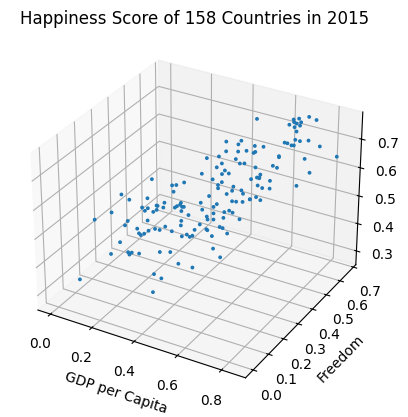

In [51]:
# Create a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot 3D scatter plot
ax.scatter3D(data_clean['Economy (GDP per Capita)'], data_clean['Freedom'], data_clean['Happiness Score'], s=3, alpha = 1)

# Show plot
plt.xlabel('GDP per Capita')
plt.ylabel('Freedom')
plt.title('Happiness Score of 158 Countries in 2015')

plt.show()

Due to the number of data points, a 2d bilinear interpolation will generate an extremely bizzare function of the true function. One way we can get around this problem is using a piecewise approach much like the one we do in cubic splines. However, we will not be requiring continuity of the derivatives. Below is the (x,y) plane that we are interested in splitting in to pieces.

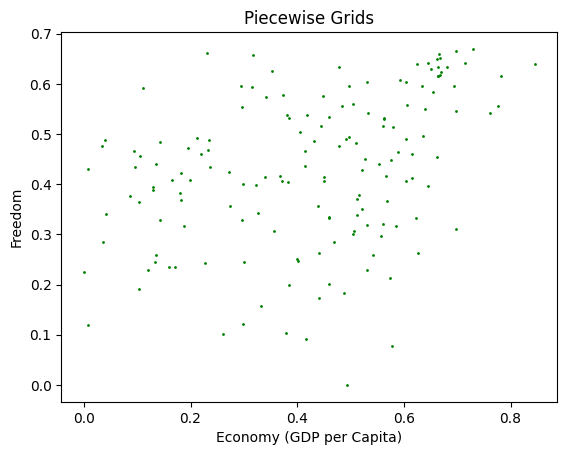

In [47]:
# Create a figure and subplots
fig, (ax1) = plt.subplots(1, 1)

# grid plot

ax1.scatter(data_clean['Economy (GDP per Capita)'], data_clean['Freedom'], color='g', s=1)
ax1.set_title("Freedom and GDP")
ax1.set_ylabel('Economy (GDP Per Capita)')
ax1.set_xlabel('Freedom')

# Show plot
plt.show()

In order to create a piecewise condition for our 2d interpolation, we must divide up the (x, y) plane into the desired grids (pieces). Looking at the x and y variables, we can see that `Freedom` $\in (0,1)$ and `Economy (GDP per Capita)` $\in (0,1)$ after our initial standardization. Then for n-uniform grids, we would need $\sqrt{n}$ intervals on the x and y axis. Then, the grids would just need to be the permutations of these intervals.

For now, we will proceed with 16-uniform grids, i.e.

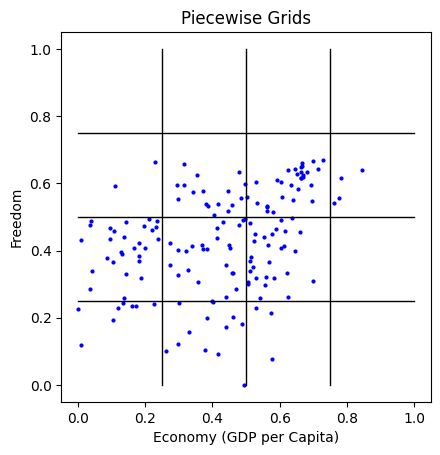

In [13]:
# Plot the grid lines
plt.plot([0, 0], [1, 1], color='black', linestyle='-', linewidth=1)  # horizontal line
plt.plot([1, 1], [0, 0], color='black', linestyle='-', linewidth=1)  # vertical line

# Plot the points
plt.scatter(data_clean['Economy (GDP per Capita)'], data_clean['Freedom'], color='blue', label='Points', s=4)

# Add labels and title
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Freedom')
plt.title('Piecewise Grids')

# Define the number of points and grid size
num_points = 3
grid_size = 1 / (num_points + 1)

# Generate grid points
x_points = np.linspace(grid_size, 1 - grid_size, num_points)
y_points = np.linspace(grid_size, 1 - grid_size, num_points)

# Plot the grid lines
for x in x_points:
    plt.plot([x, x], [0, 1], color='black', linestyle='-', linewidth=1)

for y in y_points:
    plt.plot([0, 1], [y, y], color='black', linestyle='-', linewidth=1)

# Set aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [14]:
# create a piecewise 2d-interpolation

# firstly, we need to define a grid that the pieces are defined by.

def create_ngrids(n, xrange, yrange): 
    # n: the number of grids aross one axis i.e. sqrt(total # of grids)
    # xrange: domain of x values
    # yrange: domain of y values

    # initialize the grid points
    x = []
    y = []

    # find the step value k
    xdiff = (xrange[1]- xrange[0])/n
    ydiff = (yrange[1]- yrange[0])/n

    # iteratively find all corners of the grids
    for k in range(n+1):
        x.append(xrange[0] + k * xdiff)
        y.append(yrange[0] + k * ydiff)
    
    # find the 4 corner points of each grid iteratively
    grid = []
    counter = 0 

    # start from the bottom left going up and then move towards the right
    for i in range(n):
        for j in range(n):
            grid.append({ (counter, counter % n) : [(x[i], y[j]), (x[i+1], y[j]), (x[i+1], y[j+1]), (x[i], y[j+1])]})
            counter += 1
    
    # -> grid: 2D array of the grids order going left to right and bottom to top
    return grid

In order to match the data into their respective grids, we will introduce the indicator function,

$$ \mathbb{1}_{G_{i,j}}(x, y) = 
\begin{cases} 
1 & \text{if } (x,y) \in G_{i,j} \\
0 & \text{otherwise}
\end{cases}
$$

where k = 1/4 and $G_{i,j} = \{x\in (ik, ik + k),y \in(jk, jk + k)\}$ for all $i,j$ = 0, 1, 2, 4

It follows that for a 2d bilinear interpolation, the following condition must hold;

$$
f(x,y) = P(x,y) = a + bx + cy+dxy
$$

where a, b, c, and d are arbitrary constants.

Extending such a function onto all 9 uniform grids we get the following system of equations,

$$
f_{0,0}(x,y) = \mathbb{1}_{G_{0,0}}(x, y) (a_{00} + b_{00}x + c_{00}y+d_{00}xy) \newline
f_{0,1}(x,y) = \mathbb{1}_{G_{0,1}}(x, y) (a_{01} + b_{01}x + c_{01}y+d_{01}xy) \newline
\vdots \newline
f_{3,3}(x,y) = \mathbb{1}_{G_{3,3}}(x, y) (a_{33} + b_{33}x + c_{33}y+d_{33}xy) \newline
$$

Equivalently, $\textbf{A}\vec{\beta} = \vec{z}$ where $\bold{A}$ is the matrix,

$$
\textbf{A} = \begin{pmatrix}
\mathbb{1}_{G_{0,0}} & \mathbb{1}_{G_{0,0}}x & \mathbb{1}_{G_{0,0}}y & \mathbb{1}_{G_{0,0}}xy\\
\mathbb{1}_{G_{0,1}} & \mathbb{1}_{G_{0,1}}x & \mathbb{1}_{G_{0,1}}y & \mathbb{1}_{G_{0,1}}xy\\
\vdots & \vdots & \vdots & \vdots\\
\mathbb{1}_{G_{3,3}} & \mathbb{1}_{G_{3,3}}x & \mathbb{1}_{G_{3,3}}y & \mathbb{1}_{G_{3,3}}xy\\
\end{pmatrix},
$$

$$
\vec{\beta} = [a_{00}, b_{00}, c_{00},d_{00}, a_{01}, \dots , d_{33}]^T,
$$

$$
\text{and }\vec{z} = [f_0(x,y), \dots , f_{158}(x,y)]^T
$$


However, after expanding $\textbf{A}\in M_{158x40}(\mathbb{R})$ and $\vec{\beta}\in \mathbb{R}^{40} \implies$ this is an ill-posed problem. In other words, we cannot gaurantee that an unique solution $\vec{\beta}$ exists. However, by theorem (1), we can approximate the best least-squares solution $\vec{\beta^*}$ for the problem such that, 

$$

||f(x,y)-\textbf{A}(\vec{\beta^*})|| \leq ||f(x,y)-\textbf{A}(\vec{\gamma})|| \text{ for all } \vec{\gamma} \in \mathbb{R}^{40}

$$

Side note, the reason why the the number of columns and the number of variables is 40 rather than 4*16 = 64 is because, notice, 6 of the grids do not contain any data points thus their indicator function is just 0.

In [15]:
# fit the points into the grids

collections = []

# make the 16 grids with the above function
grids = create_ngrids(4, [0,1], [0,1])

# sset aside a grid variable for the grids that actually contains values
new_grids = []

for grid in grids:
    # keep track of the data points in the grids
    data_points = []
    # iterate trough the points of the dataset
    for i in range(data_clean.shape[0]):
        x = data_clean.iloc[i, 2]
        y = data_clean.iloc[i, 3]
        t = list(grid.values())[0]
        # if the point meets the conditions of the indicator function add it to that grid
        if (t[0][0] <= x < t[1][0]) and (t[0][1] <= y < t[2][1]):
            data_points.append((x, y))
    # if a grid has atleast one point, add the point(s) as an array to the collection; add grid to new_grids with same index as points
    if len(data_points) > 0:
        collections.append(data_points)
        new_grids.append(grid)

# remove all null grids
grids = new_grids


In [16]:
# because we moved the points around after arranging them into grids; we need to move their outputs into the same order
rearranged_output = []

# check each index and match the outputs to that index as well
for points in collections:
    for point in points:
        rearranged_output.append(data_clean.loc[(data_clean['Economy (GDP per Capita)'] == point[0]) & (data_clean['Freedom'] == point[1])]["Happiness Score"].values[0])

# store as np.array for computational speed
rearranged_output = np.asarray(rearranged_output)

In [17]:
# Create matrix of data

# Now we want to create the A matrix in code. I will create the A matrix for each grid independently and append them as a "big" diagonal matrix.
def create_AMatrix(points):
    rows = []
    for p in points:
        # each row is of [1, x, y, xy]
        rows.append([1,p[0], p[1], (p[0])*p[1]])
    M = np.array(rows)
    return M

def create_squareMatrix(points):
    rows = []
    for p in points:
        # each row is of [1, x, y, xy]
        rows.append([1,p[0], p[1], p[0]*p[1], p[0]**2, (p[0]**2)*p[1], p[1]**2, (p[1]**2)*p[0],(p[0]**2)*(p[1]**2)])
    M = np.array(rows)
    return M

# array of all the matrices that will go down the diagonal
diag_matrices = []
for points in collections:
        diag_matrices.append(create_AMatrix(points))


In [26]:
from scipy.sparse import block_diag

# I will simply use a scipy function to finish creating the "big" diagonal matrix, or our A matrix (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.block_diag.html)
A = block_diag(diag_matrices)
A = A.toarray()

Since our matrix is not complex and its dimensions are computable, we can directly use theorem (2) to find the least squares solution by computing, 

$\vec{\beta^*} = (\textbf{A}^T \textbf{A})^{-1} \textbf{A}^T \vec{z}$


In [27]:
# Matrix multiplication of A^T and A
H = np.matmul(A.transpose(),A)

# finding our beta by multiplying the inverse on both sides
betastar = np.matmul(np.linalg.inv(H), np.matmul(A.transpose(), rearranged_output))
print(f"By theroem (2): B^* = {betastar}")

By theroem (2): B^* = [  0.14845018  -1.48193474   1.29716202   5.02295651   0.55464567
  -0.72507756  -0.38462542   2.25520443   0.5         -2.
   0.375        0.           0.39509863   0.1060194   -0.22380816
   1.04623835   0.92168939  -1.11027546  -1.40653905   3.70773272
   1.74432429  -3.81698308  -2.296033     7.30919222   2.5
  -3.          -2.           3.          -2.26393304   4.54941758
   6.9259773  -10.97977349  -0.78947154   1.4418781    2.14287895
  -1.9349944   15.95962861 -20.59411142 -22.49190963  30.5052256 ]


However, $\vec{\beta^*}$ alone does not really say much about the approximation. Let's plot the 2D piecewise bilinear planes to see how the estimation did in reality. Below is a plot of $\textbf{A}\vec{\beta^*}$;

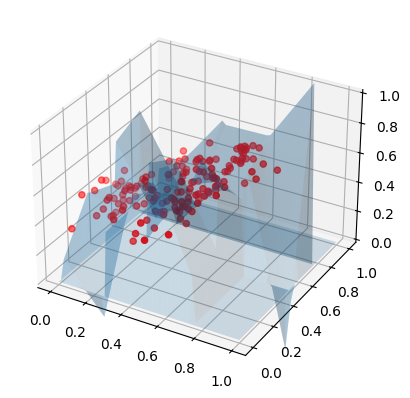

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
x, y = np.meshgrid(x, y)

eq_combined = np.zeros_like(x)
i = 0

for grid in grids:
    t = list(grid.values())[0]
    mask = (t[0][0] < x) & (x < t[1][0]) & (t[0][1] < y) & (y < t[2][1])
    eq_combined[mask] = betastar[i] + betastar[i + 1] * x[mask] + betastar[i+2] * y[mask] + betastar[i+3] * x[mask] * y[mask]
    i += 4
    
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Plot the combined piecewise equation
ax.plot_surface(x, y, eq_combined, alpha=0.2)
ax.scatter(data_clean["Economy (GDP per Capita)"], data_clean["Freedom"], data_clean["Happiness Score"], color='red', label='Points')

ax.set_zlim(0,1)

plt.show()

Visually, our least squares approximation looks quite accurate; however we can confirm this hypothesis by calculating the actual least square error;

$$
\text{Error} = ||f(x,y)-\textbf{A}(\vec{\beta^*})||
$$

where $\mathbb{E}$ is the vector of least squares for our 158 data points. We will calculate the error along with some useful statistics below.

In [29]:
z_hat = np.matmul(A, betastar)
error = np.array((data_clean["Happiness Score"] - z_hat)**2)
summation = np.sum(error)
mean = np.sum(error)/len(error)

summary = pd.DataFrame({"error" : ["LeastSquare"], "sum": [summation], "mean": [mean], "max": [error.max()], "min": [error.min()]})
summary

,error,sum,mean,max,min
0,LeastSquare,6.919717,0.043796,0.194498,0.000013


Looks like the total square error is only about 6.92, and on-average the approximation is only off by a difference of 0.044. So the approximation is not bad at all! However, this is very different from interpolation; because of the ill-posed interpolation problem, we can no longer meet the requirement that $P_n(x, y) = f(x,y)$. In fact, what we are doing is identical to a technique in statistics known as Linear Regression. Does Linear regression preform better than trying to approximating a 2D bilinear interpolation problem?

## 2D Piecewise Bilinear: Adding Complexity by Introducing a Quadratic Term

In class, we often talked about interpolations with polynomials. Above, the bilinear interpolation creates a linear approximation using only linear terms. However, we can introduce non-linear terms within our interpolation to capture non-linear data. One easy way we can do this is by introducing a quadratic term.

We can do so by adjusting the linear system of equation to include qudratics:

$$
f_{0,0}(x,y) = \mathbb{1}_{G_{0,0}}(x, y) (a_{00} + b_{00}x + c_{00}y+d_{00}xy + e_{00}x^2 +f_{00}x^2y+g_{00}y^2+h_{00}xy^2+i_{00}x^2y^2) \newline
f_{0,1}(x,y) = \mathbb{1}_{G_{0,1}}(x, y) (a_{01} + b_{01}x + c_{01}y+d_{01}xy + e_{01}x^2 +f_{01}x^2y+g_{01}y^2+h_{01}xy^2+i_{01}x^2y^2) \newline
\vdots \newline
f_{3,3}(x,y) = \mathbb{1}_{G_{3,3}}(x, y) (a_{33} + b_{33}x + c_{33}y+d_{33}xy + e_{33}x^2 +f_{33}x^2y+g_{33}y^2+h_{33}xy^2+i_{33}x^2y^2) \newline
$$

where a,b,c,d,e,f,g,h,i are all arbitrary real constants.

Which gives us the following matrix representation:

$$
\textbf{A} = \begin{pmatrix}
\mathbb{1}_{G_{0,0}} & \mathbb{1}_{G_{0,0}}x & \mathbb{1}_{G_{0,0}}y & \mathbb{1}_{G_{0,0}}xy& \mathbb{1}_{G_{0,0}}x^2& \mathbb{1}_{G_{0,0}}x^2y & \mathbb{1}_{G_{0,0}}y^2& \mathbb{1}_{G_{0,0}}xy^2& \mathbb{1}_{G_{0,0}}x^2y^2 \\
\mathbb{1}_{G_{0,1}} & \mathbb{1}_{G_{0,1}}x & \mathbb{1}_{G_{0,1}}y & \mathbb{1}_{G_{0,1}}xy& \mathbb{1}_{G_{0,1}}x^2& \mathbb{1}_{G_{0,1}}x^2y & \mathbb{1}_{G_{0,1}}y^2& \mathbb{1}_{G_{0,1}}xy^2& \mathbb{1}_{G_{0,1}}x^2y^2 \\\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
\mathbb{1}_{G_{3,3}} & \mathbb{1}_{G_{3,3}}x & \mathbb{1}_{G_{3,3}}y & \mathbb{1}_{G_{3,3}}xy& \mathbb{1}_{G_{3,3}}x^2& \mathbb{1}_{G_{3,3}}x^2y & \mathbb{1}_{G_{3,3}}y^2& \mathbb{1}_{G_{3,3}}xy^2& \mathbb{1}_{G_{3,3}}x^2y^2 
\end{pmatrix},
$$

$$
\vec{\beta} = [a_{00}, b_{00}, c_{00},d_{00}, e_{00}, f_{00} , g_{00}, h_{00}, i_{00}, a_{01}, \dots , d_{33}]^T,
$$

$$
\text{and }\vec{z} = [f_0(x,y), \dots , f_{158}(x,y)]^T
$$

Once again, we are dealing with an ill posed linear system as now we have more variables than equation; thus, we cannot gaurantee an unique solution to the system. But, similar to the bilinear case, we can a find a least sqaures solutions so that the constants are the most optimal for functions of the same degree.

$\vec{\beta^*} = (\textbf{A}^T \textbf{A})^{-1} \textbf{A}^T \vec{z}$


In [33]:
diag_matrices_quadratics = []
for points in collections:
        diag_matrices_quadratics.append(create_squareMatrix(points))

B = block_diag(diag_matrices_quadratics)
B = B.toarray()

H2 = np.matmul(B.transpose(),B)

# finding our beta by multiplying the inverse on both sides
betastar2 = np.matmul(np.linalg.inv(H2), np.matmul(B.transpose(), rearranged_output))
print(f"By theroem (2): B^* = {betastar2}")

By theroem (2): B^* = [ 1.56687500e+02  1.35450000e+03 -2.11725000e+03 -3.04600000e+03
 -1.76240000e+04  1.30904000e+05  6.30600000e+03 -1.32240000e+04
 -2.32384000e+05 -4.41888191e-03  7.06332570e+00  4.05267684e+00
 -7.77375349e+01  7.58876682e-01  1.78525015e+02 -6.88778217e+00
  1.35211854e+02 -3.84665584e+02  1.00000000e+00 -2.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.00000000e+00  0.00000000e+00
  1.50000000e+00  4.00000000e+00  0.00000000e+00 -6.85809970e+00
  4.07332867e+01  1.10777875e+02 -6.16064190e+02 -5.24938605e+01
  7.94187422e+02 -3.38689825e+02  1.87416023e+03 -2.39896466e+03
  4.75059435e+01 -2.15578161e+02 -2.31721496e+02  1.05123874e+03
  2.46994247e+02 -1.19347454e+03  2.82361189e+02 -1.26792406e+03
  1.42782576e+03  2.73726279e+02 -1.37639418e+03 -9.18566477e+02
  4.63920307e+03  1.73082234e+03 -5.84930297e+03  7.72002000e+02
 -3.90971509e+03  4.94445349e+03 -3.80000000e+01  6.80000000e+01
  1.10000000e+01 -8.00000000e+00 -3.00000000e+00  8.00000000e+00
 -3

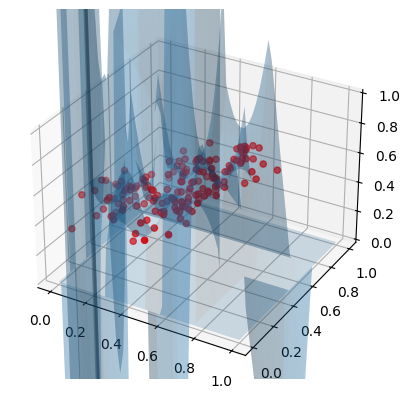

In [34]:
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
x, y = np.meshgrid(x, y)

eq_combined = np.zeros_like(x)
i = 0

for grid in grids:
    t = list(grid.values())[0]
    mask = (t[0][0] < x) & (x < t[1][0]) & (t[0][1] < y) & (y < t[2][1])
    eq_combined[mask] = betastar2[i] + betastar2[i + 1] * x[mask] + betastar2[i+2] * y[mask] + betastar2[i+3] * x[mask] * y[mask] + betastar2[i+4] * (x[mask]**2) + betastar2[i+5] * (x[mask]**2) * y[mask] +  betastar2[i+6] * (y[mask]**2) +betastar2[i+7] * (y[mask]**2) *(x[mask]) + betastar2[i+8] * (y[mask]**2) *(x[mask]**2)
    i += 9
    
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Plot the combined piecewise equation
ax.plot_surface(x, y, eq_combined, alpha=0.2)
ax.scatter(data_clean["Economy (GDP per Capita)"], data_clean["Freedom"], data_clean["Happiness Score"], color='red', label='Points')

ax.set_zlim(0,1)

plt.show()

In [35]:
z_hat2 = np.matmul(B, betastar2)
error2 = np.array((data_clean["Happiness Score"] - z_hat2)**2)
summation2 = np.sum(error2)
mean2 = np.sum(error2)/len(error2)

summary2 = pd.DataFrame({"error" : ["LeastSquare"], "sum": [summation2], "mean": [mean2], "max": [error2.max()], "min": [error2.min()]})
summary2

,error,sum,mean,max,min
0,LeastSquare,26.25277,0.166157,15.973388,0.000008


For this dataset, a more complex function (quadratic) did worse than a simpler model (bilinear) when it comes to minizing the least squares error.

## Multivariate Linear Regression

As mentioned above, what we did in the 2D Piecewise Bilinear Interpolation is nearly identical to a multivariate linear regression. The reason is because of the ill-posed linear system. Since the linear system of equations did not meet the requirements for a unique solution we actually cannot meet the requirements for a proper interpolation i.e. not all (x,y)'s satisfies f(x,y) = P(x,y). When this happens, we can only try to get as close as possible to the true solution; we chose to do so by using the method of Least Squares Approximation as proven in theorems (1) and (2). This is exactly linear regression as it deals with a truth function that one does not know the parameters for so we try to estimate the truth function by optimizing an objective function; and one of these objective functions just happens to be the Least Squares Error.

The Equation we are trying to solve:

$$
Z = \beta _0 + \beta _1X + \beta _2Y
$$

This is our truth function; however, we can never solve for the truth function because of random error in data; we can only approximate the expected function,

$$
\mathbb{E}[z_i] = \mathbb{E}[\beta _0 + \beta _1x_i + \beta _2y_i + \epsilon _i] \newline
$$

where $\epsilon _i$ is a normally distributed random variable with mean 0 ($\mathbb{E}[\epsilon _i] = 0$) and some variance $\sigma^2$ that is not dependent on $X$ and $z_i, x_i, y_i$ are random variables pulled from the true distributions of $X$, $Y$, and $Z$ a.k.a. samples.

Let $\mathbb{E}[z_i] = \hat{z}_i$; then, by linearity of the expectation, 

$$

\hat{z}_i = \mathbb{E}[\beta _0 + \beta _1x_i + \beta _2y_i] + \mathbb{E}[\epsilon _i] \newline
\hat{z}_i = \hat{\beta _0} + \hat{\beta _1}x_i + \hat{\beta _2}y_i + 0
$$

For this problem, we have access to 158 samples from the 2015 World Happiness Record:
$$
\overrightarrow{\text{GDP}} = (x_1, x_2, ... x_{158}), \quad \overrightarrow{\text{Freedom}} = (y_1, y_2, ..., y_{158}), \quad
\overrightarrow{\text{Happiness}} = (z_1, z_2, ..., z_{158}),
$$



Then, rewriting in matrix notation we get the following;

$$
\hat{Z} = \textbf{A}\vec{\hat{\beta}}
$$

where $\textbf{A}$ is the matrix,

$$
\textbf{A} = \begin{pmatrix}
1 & x_1 & y_1\\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots\\
1 & x_{158} & y_{158}
\end{pmatrix}
$$

and $\vec{\hat{\beta}}$ is a vector of coefficients (in the case of equation i),

$$
\vec{\hat{\beta}} = \begin{pmatrix}
\hat{\beta} _0\\
\hat{\beta}_1\\
\hat{\beta} _2
\end{pmatrix}
$$

In order to find the plane of best fit for our data, we introduce an objective function that we will optimize.

$$

\vec{\hat{\beta}}^* = \displaystyle{\min_{\vec{\hat{\beta}} \in \vec{\beta}} ||\vec{z_i} - \textbf{A}\vec{\hat{\beta}}||}

$$

where $\vec{\hat{\beta}}^*$ is the best least squares coefficient for our function $\hat{z}_i = \hat{\beta _0} + \hat{\beta _1}x_i + \hat{\beta _2}y_i$

In [46]:
def gradient_descent_data(X, y, learning_rate=0.01, num_iterations=1000, tolerance=1e-6):

    # Initialize coefficients
    coefficients = np.zeros(3)
    coef_history = [coefficients.copy()]

    mse_history = []
    for _ in range(num_iterations):
        # Compute predictions
        predictions = np.dot(X, coefficients)

        # Compute gradients
        errors = predictions - y
        gradients = np.dot(X.T, errors) / len(y)

        # Update coefficients
        new_coefficients = coefficients - learning_rate * gradients

        # Stopping criterion
        if np.linalg.norm(new_coefficients - coefficients) < tolerance:
            break

        coefficients = new_coefficients
        coef_history.append(coefficients.copy())

        # Compute mean squared error
        mse = np.mean(errors**2)
        mse_history.append(mse)

    return coefficients, mse, coef_history, mse_history

# Example data points (replace with your own data)
def create_XMatrix(points):
    rows = []
    for p in points:
        # each row is of [1, x, y, xy]
        rows.append([1,p[0], p[1]])
    M = np.array(rows)
    return M

points = []

for row in range(data_clean.shape[0]):
    x = data_clean.iloc[row, 2]
    y = data_clean.iloc[row, 3]
    points.append((x,y))

X = create_XMatrix(np.array(points))
y = np.array(data_clean["Happiness Score"])

The most optimal B_0, B_1, and B_2 are [0.35932861 0.23422454 0.19147089]


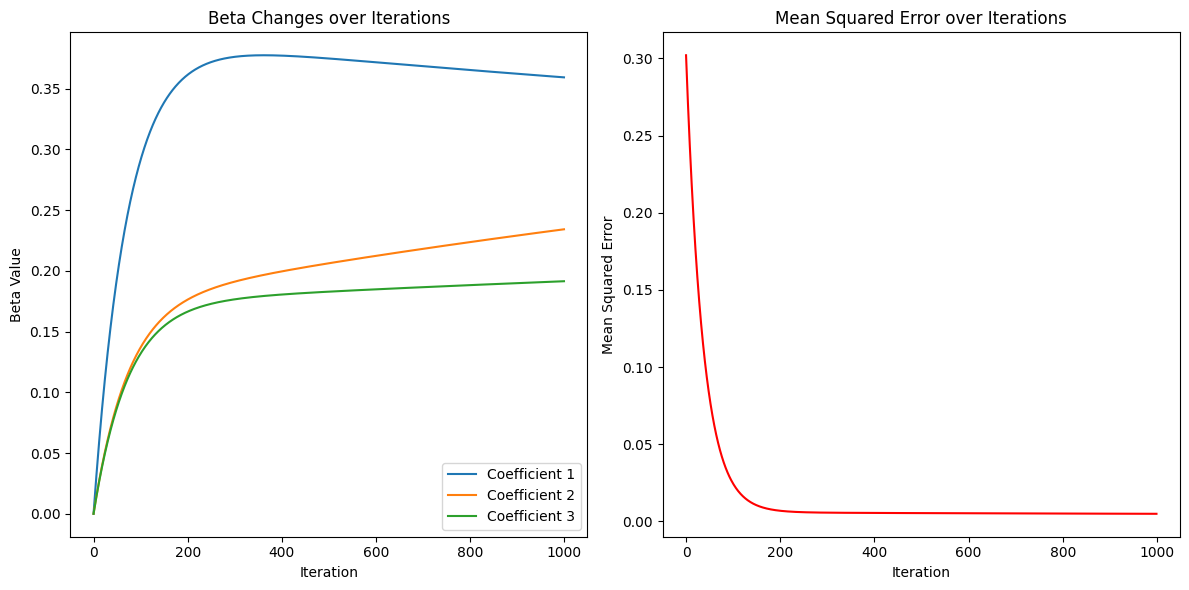

In [45]:
# Run gradient descent with plotting
optimal_coefficients, min_mse, coef_history, mse_history = gradient_descent_data(X, y)
print(f"The most optimal B_0, B_1, and B_2 are {optimal_coefficients}")
# Plotting
plt.figure(figsize=(12, 6))

# Plotting coefficient changes
plt.subplot(1, 2, 1)
coef_history = np.array(coef_history)
for i in range(coef_history.shape[1]):
    plt.plot(coef_history[:, i], label=f'Coefficient {i+1}')
plt.xlabel('Iteration')
plt.ylabel('Beta Value')
plt.title('Beta Changes over Iterations')
plt.legend()

# Plotting mean squared error changes
plt.subplot(1, 2, 2)
plt.plot(mse_history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error over Iterations')

plt.tight_layout()
plt.show()

By iterating through the coefficent, we find that the most optimal coefficients are:

$$
\beta_0^* = 0.359, \quad \beta_1^* = 0.234, \quad \beta_2^* = 0.191
$$

Thus, we can constructed the least squares approximation for our data points;

$$
\hat{z}_i = 0.359 + 0.234(\hat{x_i}) + 0.191(\hat{y_i})
$$

In [42]:
z_hat3 = np.matmul(X, optimal_coefficients)
error3 = np.array((data_clean["Happiness Score"] - z_hat3)**2)
summation3 = np.sum(error3)
mean3 = np.sum(error3)/len(error3)

summary3 = pd.DataFrame({"error" : ["LeastSquare"], "sum": [summation3], "mean": [mean3], "max": [error3.max()], "min": [error3.min()]})
summary3

,error,sum,mean,max,min
0,LeastSquare,0.78367,0.00496,0.028786,0.000014


# Conclusion

# References